# DRILL: Regularization parameter: Lasso

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration, and base your plot on the X_train2 feature set.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Test the simpler model with smaller coefficients.
Y_test = df_test['income'].values.reshape(-1, 1)
X_test = df_test.loc[:, ~(df_test.columns).isin(['income'])]

# Test the more complex model with larger coefficients.
df_test['balance_student'] = df_test['balance'] * df_test['student']
df_test['balance_default'] = df_test['balance'] * df_test['default']
df_test['student_default'] = df_test['student'] * df_test['default']
df_test['balance_sqrt'] = (df_test['balance'] + 100) ** .5
df_test['balance2'] = (df_test['balance'] + 100) ** 2
df_test['balance3'] = (df_test['balance'] + 100) ** 3
X_test2 = df_test.loc[:, ~(df_test.columns).isin(['income'])]


In [3]:
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))

# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))

R² for the model with few features:
0.4500625793011847

R² for the model with many features:
0.44363376712897096


## Regularization parameter: Lasso

The $\lambda$ for lasso can var between 0 (no penalty, acts like OLS) and infinity.  If $\lambda$ is too large, all parameters will be set to zero.  

Create a plot below of how $R^2$ varies across different values of $\lambda$ for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same $R^2$ for a given lambda value?

Submit your work and discuss the results with your mentor.

In [4]:
# Your code here

# Create a dictionary to hold summary data
lambda_vals = np.arange(0.1,500,0.1)
summary_dict = {'lambda':lambda_vals,
                'ridge_rsq':[],
                'lasso_rsq':[]}

for value in lambda_vals:
    lasso = linear_model.Lasso(alpha=value)
    lasso.fit(X_train2, Y_train)
    summary_dict['lasso_rsq'].append(lasso.score(X_train2, Y_train))
    
    ridge = linear_model.Ridge(alpha=value)
    ridge.fit(X_train2, Y_train)
    summary_dict['ridge_rsq'].append(ridge.score(X_train2, Y_train))
    
r_square = pd.DataFrame(summary_dict)


***Before we plot we can look at the $R^2$ of ridge and lasson to see if there are any notable differences numerically.***

In [5]:
r_square.head(10)

,lambda,ridge_rsq,lasso_rsq
0,0.1,0.573972,0.563089
1,0.2,0.573972,0.531235
2,0.3,0.573972,0.478145
3,0.4,0.573972,0.403815
4,0.5,0.573972,0.308250
5,0.6,0.573972,0.191447
6,0.7,0.573972,0.053408
7,0.8,0.573972,0.026834
8,0.9,0.573972,0.026834
9,1.0,0.573972,0.026834


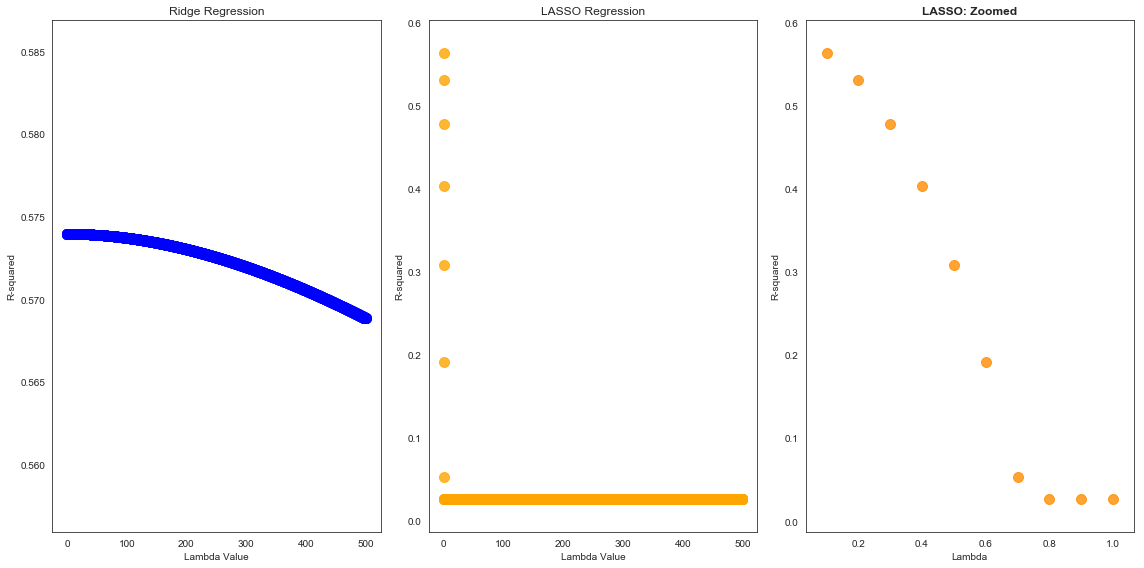

In [6]:
plt.figure(figsize=(16,8))

ax1 = plt.subplot(131)
sns.regplot(x='lambda', 
            y='ridge_rsq', 
            data=r_square,
            fit_reg=False,
            color='blue',
           scatter_kws={"s":100})

ax1.set_title('Ridge Regression')
ax1.set_ylabel('R-squared')
ax1.set_xlabel('Lambda Value')

ax2 = plt.subplot(132)
sns.regplot(x='lambda', 
            y='lasso_rsq', 
            data=r_square,
            fit_reg=False,
            color='orange',
            scatter_kws={"s":100})

ax2.set_title('LASSO Regression')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Lambda Value')


ax2 = plt.subplot(133)
sns.regplot(x='lambda', 
            y='lasso_rsq', 
            data=r_square[:10], 
            fit_reg=False, 
            color='darkorange',
            scatter_kws={"s":100})

ax2.set_title('LASSO: Zoomed', fontweight='bold')
ax2.set_ylabel('R-squared')
ax2.set_xlabel('Lambda')

plt.tight_layout()
plt.show()

# Summary

Ridge regression yields and $R^2$ of 0.573972 for almost the first 100 lambda values before slowly curving down to 0.568856 at a lambda value of 500. On the other hand, Lasso's $R^2$ drops from 0.563089 to 0.026834 within the first 8 iterations of lambda values and seems to just stay there. It would seem that lasso suggests that after the regularization parameter ($\lambda$) reaches 0.8 the remainding features can probably be dropped.